In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [13]:
df = pd.read_csv("updated_weatherAUS.csv")

In [14]:
df = pd.read_csv("updated_weatherAUS.csv")

df = df.drop("Date", axis=1)
df["RainToday"] = (df["RainToday"] == "Yes").astype("int16")
df["RainTomorrow"] = (df["RainTomorrow"] == "Yes").astype("int16")
df = df.drop("WindGustDir", axis=1)
df = df.drop("WindDir9am", axis=1)
df = df.drop("WindDir3pm", axis=1)

#df = df.drop("Location", axis=1)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,0.0,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0
2,0.0,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0
3,0.0,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0
4,0.0,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [15]:

scaler = StandardScaler()
data_standardized = scaler.fit_transform(df.values)


In [16]:
k=4
kmeans = KMeans(n_clusters=k, random_state=40)

In [17]:
kmeans.fit(data_standardized)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=40)

In [18]:
df['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

In [19]:
# sns.scatterplot(x="Sunshine", y="Evaporation", data=df, hue="Cluster")

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)
cols = df.columns
X = df[cols[:18]].values
transformed_x = pca.fit_transform(data_standardized)

transformed_x= pd.DataFrame(np.column_stack((transformed_x, kmeans.labels_)))

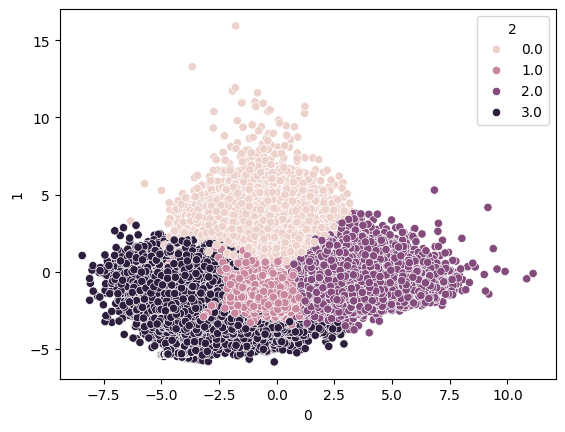

In [22]:
sns.scatterplot(x=0, y=1, data=transformed_x, hue=2)
plt.show()